<a href="https://colab.research.google.com/github/iRxpz/Kidney-Disease-Classification/blob/main/Kidney_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_kidney_disease.csv')

In [5]:
df.drop('Unnamed: 0', axis=1)

,age,sg,su,pc,pcc,ba,bgr,bu,sc,sod,...,cad,appet,pe,ane,classification,al_0.0,al_1.0,al_2.0,al_3.0,al_4.0
0,48.0,1.020,0.0,1,0,0,121.0,36.0,1.2,138.829091,...,0,1,0,0,1,0,1,0,0,0
1,51.0,1.010,0.0,1,0,0,106.0,26.0,1.4,138.829091,...,0,1,0,0,1,0,0,1,0,0
2,60.0,1.015,0.0,1,0,0,74.0,25.0,1.1,142.000000,...,0,1,1,0,1,0,0,0,1,0
3,52.0,1.015,0.0,0,1,0,138.0,60.0,1.9,138.829091,...,0,1,0,1,1,0,0,0,1,0
4,53.0,1.020,0.0,0,1,0,70.0,107.0,7.2,114.000000,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,55.0,1.020,0.0,1,0,0,140.0,49.0,0.5,150.000000,...,0,1,0,0,0,1,0,0,0,0
342,42.0,1.025,0.0,1,0,0,75.0,31.0,1.2,141.000000,...,0,1,0,0,0,1,0,0,0,0
343,12.0,1.020,0.0,1,0,0,100.0,26.0,0.6,137.000000,...,0,1,0,0,0,1,0,0,0,0
344,17.0,1.025,0.0,1,0,0,114.0,50.0,1.0,135.000000,...,0,1,0,0,0,1,0,0,0,0


In [7]:
#Split Train, Test, Validation
y = df.loc[:, 'classification']
xcols = list(df.columns.values)
xcols.remove('classification')
x = df.loc[:, xcols]

x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = True, test_size=0.1)
#Taking training for validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, shuffle = True, test_size=0.1)

In [9]:
#Build Pipeline
pipe = Pipeline([('scaler', MinMaxScaler()), ('pca', PCA()), ('svc', SVC())])

In [10]:
#Select values to search
params = {'pca__n_components': np.random.randint(1, len(xcols), 3),
          'svc__C': [10**-3,1,10**3],
          'svc__coef0': [0, 1],
          'svc__kernel': ['poly', 'sigmoid', 'rbf'],
          'svc__gamma': [1/(len(df) - 1), 1/(len(df)), 1/(len(df) + 1)],
          'svc__degree': [1, 6, 3]}

In [11]:
grid_search = GridSearchCV(pipe, params)
grid_search.fit(x_val, y_val)

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('pca', PCA()), ('svc', SVC())]),
             param_grid={'pca__n_components': array([23, 13, 18]),
                         'svc__C': [0.001, 1, 1000], 'svc__coef0': [0, 1],
                         'svc__degree': [1, 6, 3],
                         'svc__gamma': [0.002898550724637681,
                                        0.002890173410404624,
                                        0.002881844380403458],
                         'svc__kernel': ['poly', 'sigmoid', 'rbf']})

In [12]:
#best_params
grid_search.best_params_

{'pca__n_components': 23,
 'svc__C': 1000,
 'svc__coef0': 0,
 'svc__degree': 1,
 'svc__gamma': 0.002898550724637681,
 'svc__kernel': 'poly'}

In [14]:
scalar = MinMaxScaler()
scalar.fit(x_train)
x_train_scaled = scalar.transform(x_train)

In [15]:
pca = PCA(n_components=23)
pca.fit(x_train_scaled)
x_trained_pca = pca.transform(x_train_scaled)

In [16]:
svc = SVC(C=1000, coef0=0, degree=1, gamma=0.002898550724637681, kernel='poly')
svc.fit(x_trained_pca, y_train)

SVC(C=1000, coef0=0, degree=1, gamma=0.002898550724637681, kernel='poly')

In [17]:
#Get testing data in correct format
scaler = MinMaxScaler()
scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)
pca = PCA(n_components=23)
pca.fit(x_test_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [28]:
#Get Predictions
y_trained_pred = svc.predict(x_trained_pca)
y_test_pred = svc.predict(x_test_pca)

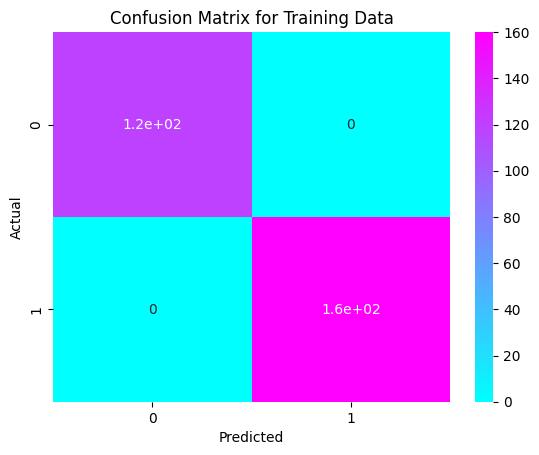

In [38]:
con_max_train = confusion_matrix(y_train, y_trained_pred)
sns.heatmap(con_max_train, cmap = 'cool', annot=True)
plt.title('Confusion Matrix for Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

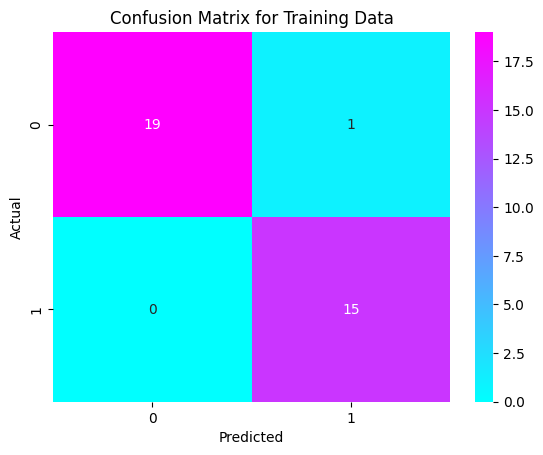

In [39]:
con_max_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(con_max_test, cmap = 'cool', annot=True)
plt.title('Confusion Matrix for Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [44]:
Acc_train = (con_max_train[0,0] + con_max_train[1,1]) / (con_max_train[0,0] + con_max_train[0,1] + con_max_train[1,0] + con_max_train[1,1])
print(Acc_train)

1.0


In [45]:
Acc_test = (con_max_test[0,0] + con_max_test[1,1]) / (con_max_test[0,0] + con_max_test[0,1] + con_max_test[1,0] + con_max_test[1,1])
print(Acc_test)

0.9714285714285714
